<a href="https://colab.research.google.com/github/H-E-L-P/dmu_products/blob/master/dmu31/dmu31_Examples/dmu31_CIGALE_SFR_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ![](https://avatars1.githubusercontent.com/u/7880370?s=75&v=4) Selecting interesting objects using CIGALE physical properties

---
As covered in our introduction to using the HELP virtual observatory server (VOX), we can easily search the HELP database for catalogues in images. In this example, we show how you can do similar searches, but using CIGALE properties rather than positions. One of the advantages of HELP is that it covers a large area, and with a larger area, you can get larger statistical samples of the rarer objects.

In this notebook, we will search the entire HELP database for some galaxies with extreme starformation and get the corresponding SPIRE cutouts.


In [1]:
!pip install pyvo

     |████████████████████████████████| 808kB 5.7MB/s 
  Created wheel for pyvo: filename=pyvo-1.1-cp37-none-any.whl size=801573 sha256=24e3774bdeae7ec76549f0e24e778fe6cf5b4eb235927b18e6e2022258a10668
  Stored in directory: /root/.cache/pip/wheels/d9/00/df/656aac56938f1c83dfcb361346f74101ce1f8c849fc93b18dc
  Created wheel for mimeparse: filename=mimeparse-0.1.3-cp37-none-any.whl size=3864 sha256=6adf19efd3cfcb6c1c3910fdca837f6213002f3833978589033e0e7d81899103
  Stored in directory: /root/.cache/pip/wheels/54/ca/c7/3db47cc5c748286db22a7fab43ccf985903d2b9ca119de16ab
Successfully built pyvo mimeparse


In [3]:
from astropy.io import ascii, fits
import numpy as np
from astropy.table import Table
import pylab as plt
import seaborn as sns
%matplotlib inline
from astropy import wcs
import pyvo as vo

First, create the TAP service using [PyVO](https://pyvo.readthedocs.io/en/latest/)

In [5]:
service = vo.dal.TAPService("https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap")

 Lets select the top 1000 galaxies which have high starformation rate (i.e. SFR>1000 $M_{\odot}/yr$)

As before, we need to create a query, so:
* use the `SELECT` operational statement and ask for the `TOP 1000` results
* we specify what columns we want (i.e. redshift, starformation rate and stellar mass), rather than returning all (as before)
* Tell the VO to get the results `FROM herschelhelp.main`, i.e. the main HELP masterlist. You can find the other tables you could use [here](https://herschel-vos.phys.sussex.ac.uk/__system__/dc_tables/list/form).
* specify our condition

In [8]:
resultset= service.search("SELECT TOP 100 ra,dec,redshift,cigale_mstar,cigale_sfr FROM herschelhelp.main WHERE cigale_sfr>1000")

In [9]:
masterlist=resultset.to_table()

In [24]:
masterlist.show_in_notebook()

idx,ra,dec,redshift,cigale_mstar,cigale_sfr
,deg,deg,,Msun,Msun / yr
0,34.6715089475648,-5.64677315829761,5.5069,189901422274.742,1497.14628391181
1,34.7214719475648,-5.65702015829761,5.1541,439717232811.725,2592.40844298865
2,34.8559762522776,-5.69354112477323,4.1005,449923925549.177,1588.63468495625
3,35.0222152722776,-5.69805032477323,4.2907,799333947897.97,5045.7118616998
4,34.9233084422776,-5.60976520477323,5.6961,135131688898.356,5462.43158380247
5,35.0984050822776,-5.51291523477323,5.1875,633300196639.846,1725.04141562314
6,34.6088506122776,-5.46179850477323,4.1559,1809691425872.29,4797.29912286647
7,34.7898939475648,-5.42053215829761,1.9407,1633228166190.24,1571.92375035589
8,34.8067338722776,-5.35714472477323,2.9219,262978332262.599,1540.89465885952


Lets look at the marginalised distributions

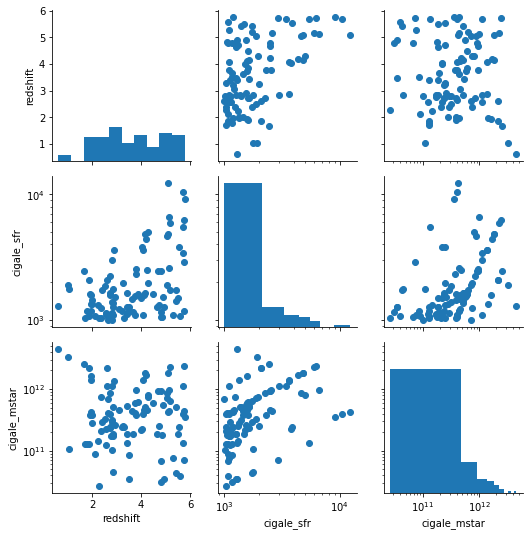

In [33]:
g=sns.PairGrid(masterlist[['redshift','cigale_sfr','cigale_mstar']].to_pandas())
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)

g.axes[0,1].set_xscale('log')
g.axes[0,2].set_xscale('log')
g.axes[1,0].set_yscale('log')
g.axes[2,0].set_yscale('log')

Lets look at the object that has an SFR of over 12000 $M_{\odot}/yr$

![](https://avatars1.githubusercontent.com/u/7880370?s=75&v=4)

**Authors**: Peter Hurley

The Herschel Extragalactic Legacy Project, (HELP), is a European Commission Research Executive Agency funded project under the SP1-Cooperation, Collaborative project, Small or medium-scale focused research project, FP7-SPACE-2013-1 scheme, Grant Agreement Number 607254.
